 # Groceries (Learning to use Apriori Algorithm)

In [3]:
import numpy as np #linear algebra
import pandas as pd #data processing, csv file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

### Apriori Algorithm

Apriori is an algorithm for frequent itemset mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent itemsets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis.

### An example of Association Rules

Assume there are 100 customers
10 of them bought milk, 8 bought butter and 6 bought both of them.
bought milk => bought butter
support = P(Milk & Butter) = 6/100 = 0.06
confidence = support/P(Butter) = 0.06/0.08 = 0.75
lift = confidence/P(Milk) = 0.75/0.10 = 7.5

Note: this example is extremely small. In practice, a rule needs the support of several hundred transactions, before it can be considered statistically significant, and datasets often contain thousands or millions of transactions.

### Some important terms:

Support: This says how popular an itemset is, as measured by the proportion of transactions in which an itemset appears.

Confidence: This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Lift: This says how likely item Y is purchased when item X is purchased while controlling for how popular item Y is.

### Load the dataset

In [4]:
data = pd.read_csv("Groceries_dataset.csv")

In [5]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


### Exploratory Data Analysis

In [6]:
data.isna().sum() #checking for empty cells

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [7]:
data.nunique() # unique entries fro eaxh column

Member_number      3898
Date                728
itemDescription     167
dtype: int64

In [8]:
data.shape #rows,colimns

(38765, 3)

In [9]:
data.info

<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [11]:
data.Date = pd.to_datetime(data.Date)
data.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-05-01,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-01-02,whole milk


In [15]:
data['Year'] = data.Date.apply(lambda x : x.year)
data['Month'] = data.Date.apply(lambda x : x.month)
data['Days of Week'] = data.Date.apply(lambda x : x.dayofweek)
data.head()

,Member_number,Date,itemDescription,Year,Month,Days of Week
0,1808,2015-07-21,tropical fruit,2015,7,1
1,2552,2015-05-01,whole milk,2015,5,4
2,2300,2015-09-19,pip fruit,2015,9,5
3,1187,2015-12-12,other vegetables,2015,12,5
4,3037,2015-01-02,whole milk,2015,1,4


In [16]:
data.nunique()

Member_number      3898
Date                728
itemDescription     167
Year                  2
Month                12
Days of Week          7
dtype: int64

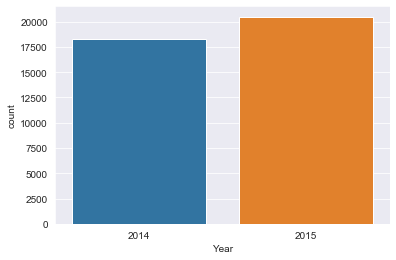

In [18]:
sns.countplot(data.Year)
plt.show()

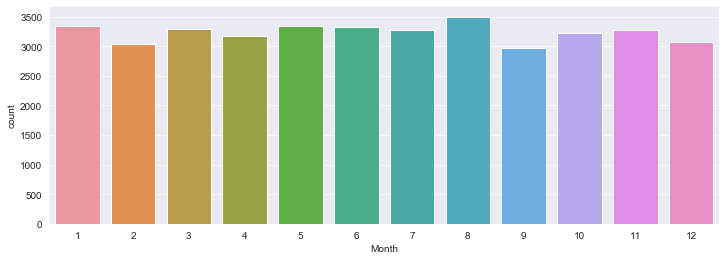

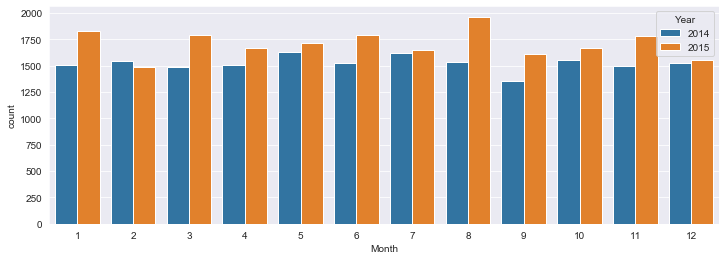

In [19]:
plt.figure(figsize =(12,4))
sns.countplot(data.Month)
plt.show()

plt.figure(figsize = (12,4))
sns.countplot(data.Month, hue = data.Year)
plt.show()

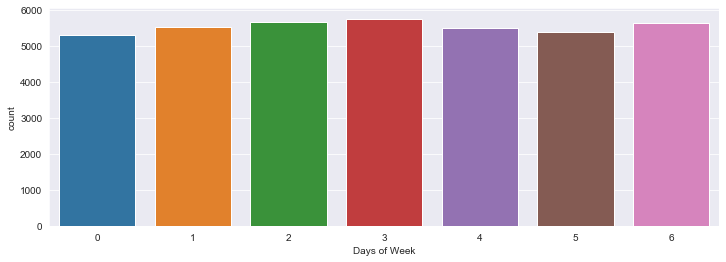

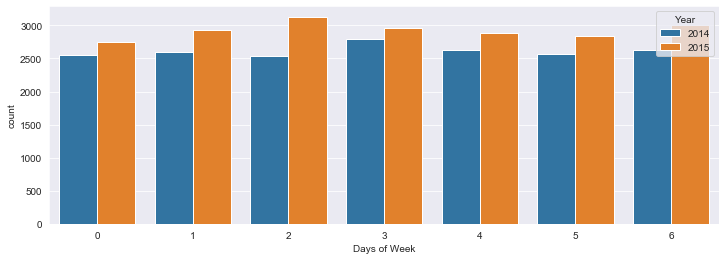

In [20]:
plt.figure(figsize = (12,4))
sns.countplot(data['Days of Week'])
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(data['Days of Week'], hue = data.Year)
plt.show()

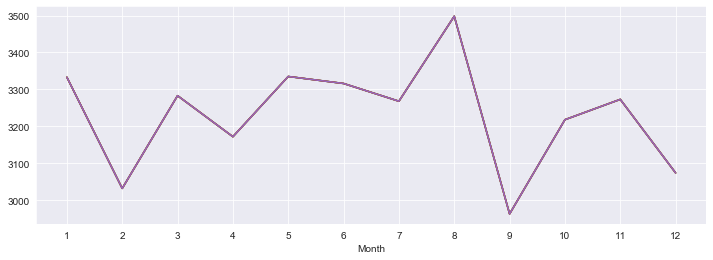

In [21]:
data.groupby('Month').count().plot(legend = False, figsize = (12,4))
plt.xticks([i for i in range(1,13)])
plt.show()

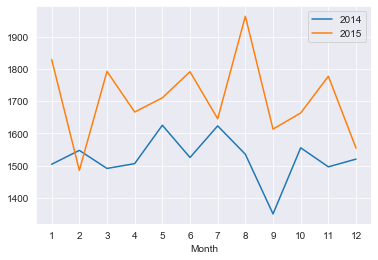

In [23]:
data[data['Year']==2014].groupby('Month').count()['Date'].plot(label=2014)
data[data['Year']==2015].groupby('Month').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(1,13)])
plt.legend()
plt.show()

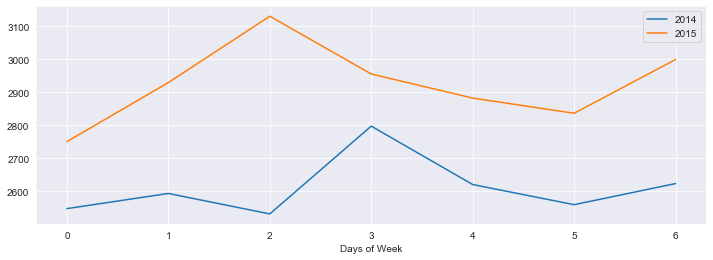

In [27]:
data[data['Year']==2014].groupby('Days of Week').count()['Date'].plot(label=2014,figsize=(12,4))
data[data['Year']==2015].groupby('Days of Week').count()['Date'].plot(label=2015)
plt.xticks([i for i in range(0,7)])
plt.legend()
plt.show()

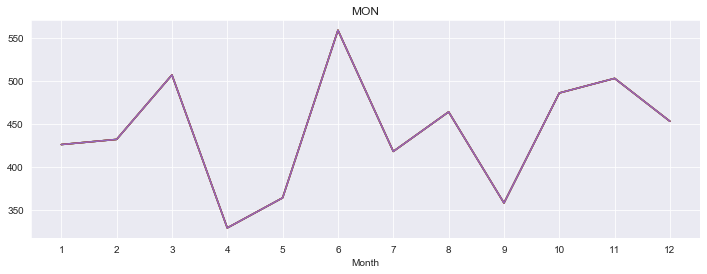

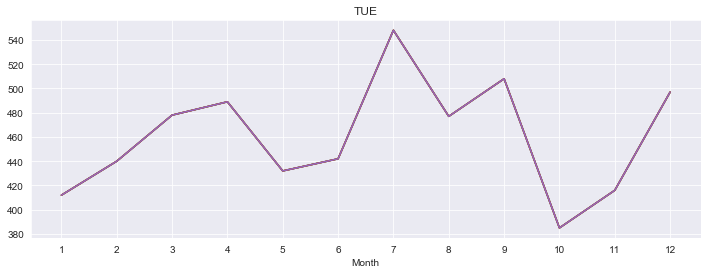

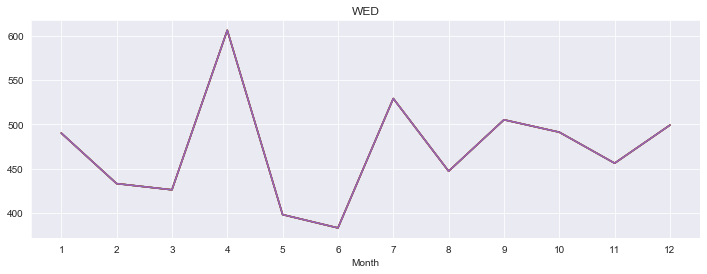

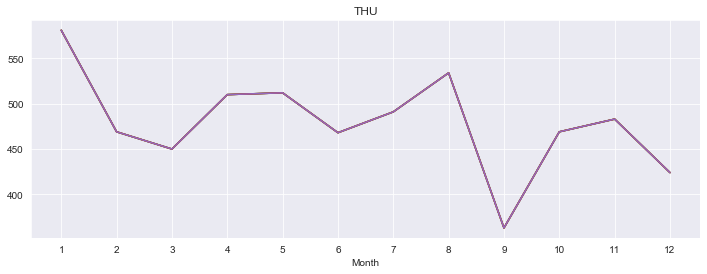

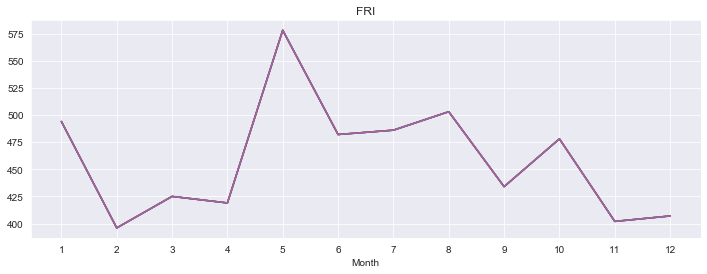

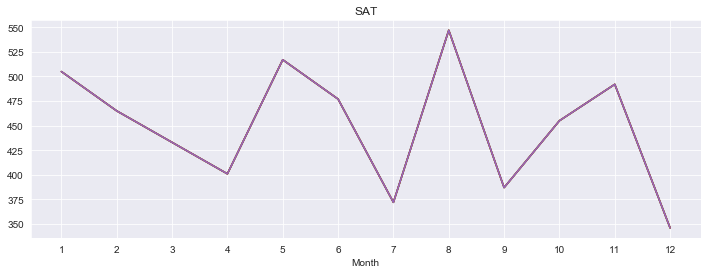

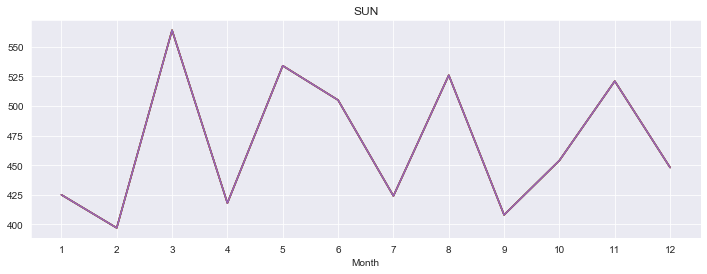

In [28]:
days = {0: 'Mon' , 1:'Tue' , 2:'Wed' ,3:'Thu' ,4:'Fri' ,5:'Sat' ,6:'Sun'}
for i in range(0,7):
    data[data['Days of Week']==i].groupby('Month').count().plot(legend=False, figsize=(12,4))
    plt.xticks([i for i in range(1,13)])
    plt.title(days[i].upper())
    plt.show()

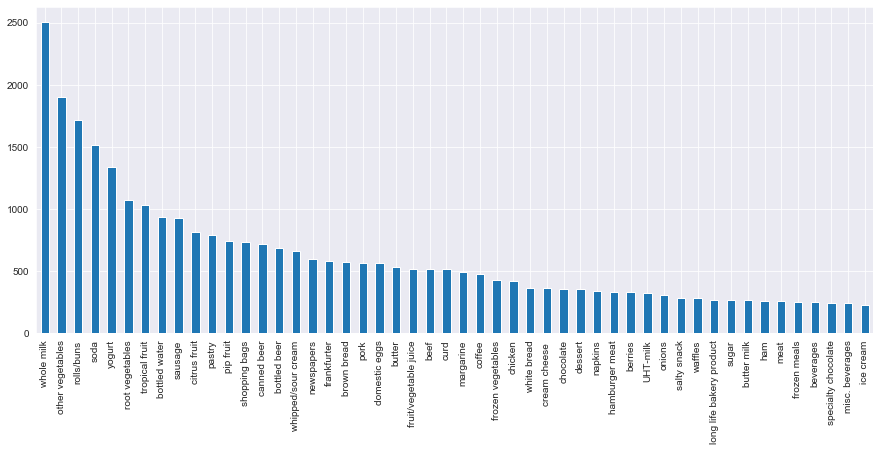

In [29]:
data.itemDescription.value_counts().head(50).plot(kind='bar' ,figsize=(15,6))
plt.show()

In [30]:
pd.DataFrame(data.itemDescription.value_counts()/len(data)).head()

,itemDescription
whole milk,0.064543
other vegetables,0.048962
rolls/buns,0.044267
soda,0.039056
yogurt,0.034412


### Feature Engineering

In [31]:
dummies = pd.get_dummies(data.itemDescription)
dummies.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
data = data.join(dummies)
data.head()

,Member_number,Date,itemDescription,Year,Month,Days of Week,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,tropical fruit,2015,7,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,whole milk,2015,5,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,pip fruit,2015,9,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,other vegetables,2015,12,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,whole milk,2015,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
item = data.itemDescription.unique()

In [37]:
data = data.groupby(['Member_number' , 'Date'])[item[:]].sum()
data.head(10)

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          2014-06-24               0           1          0   
              2015-03-15               0           1          0   
              2015-05-27               0           0          0   
              2015-07-24               0           0          0   
              2015-11-25               0           0          0   
1001          2014-07-02               0           1          0   
              2014-12-12               0           1          0   
              2015-01-20               0           0          0   
              2015-02-05               0           0          0   
              2015-04-14               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          2014-06-24                 0           0           0   
              2015-03-15                 0           0           0   
              2015-05-27                 0           0           0   
              2015-07-24                 0           0           0   
              2015-11-25                 0           0           0   
1001          2014-07-02                 0           1           0   
              2014-12-12                 0           0           0   
              2015-01-20                 0           0           0   
              2015-02-05                 0           0           0   
              2015-04-14                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          2014-06-24             0     0            0        0  ...   
              2015-03-15             0     0            0        0  ...   
              2015-05-27             0     0            0        0  ...   
              2015-07-24             0     0            0        0  ...   
              2015-11-25             0     0            0        0  ...   
1001          2014-07-02             0     0            0        0  ...   
              2014-12-12             0     0            0        0  ...   
              2015-01-20             0     0            1        0  ...   
              2015-02-05             0     0            1        0  ...   
              2015-04-14             0     1            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          2014-06-24               0     0    0               0   
              2015-03-15               0     0    0               0   
              2015-05-27               0     0    0               0   
              2015-07-24               0     0    0               0   
              2015-11-25               0     0    0               0   
1001          2014-07-02               0     0    0               0   
              2014-12-12               0     0    0               0   
              2015-01-20               0     0    0               0   
              2015-02-05               0     0    0               0   
              2015-04-14               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          2014-06-24                     0               0            0   
              2015-03-15                     0               0            0   
              2015-05-27                     0               0            0   
              2015-07-24                     0               0            0   
              2015-11-25                     0               0            0   
1001          2014-07-02                     0               0           

In [39]:
data = data.reset_index()

In [40]:
data.head(10)

,Member_number,Date,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,1000,2014-06-24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1000,2015-03-15,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1000,2015-05-27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,2015-07-24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,2015-11-25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1001,2014-07-02,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1001,2014-12-12,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1001,2015-01-20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1001,2015-02-05,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1001,2015-04-14,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
data = data.drop(['Member_number' , 'Date'], axis = 1)

In [42]:
data.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Converting true values to its column names

temp = data.copy()

for i in range(len(temp)):
    for j in (temp.columns):
        if temp.loc[i,j]>0:
            temp.loc[i,j]=j
temp.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
temp = temp.values
transactions =[]
for i in range(14693):
    x=[]
    for j in range(167):
        if temp[i,j]!=0:
            x.append(temp[i,j])
    transactions.append(x)
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['whole milk', 'butter'],
 ['other vegetables', 'frozen vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['rolls/buns', 'sausage'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['whole milk', 'root vegetables', 'pastry'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['other vegetables', 'hygiene articles'],
 

### Model Building 

In [46]:
!pip install apyori
from apyori import apriori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5979 sha256=2fc33ef69f54f068eb254328b4322f5d111c08feadfaa69d4ae45e43b2f30af7
  Stored in directory: c:\users\91882\appdata\local\pip\cache\wheels\cb\f6\e1\57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [50]:
results = apriori(transactions, min_support=0.0003, min_confidence = 0.02, min_lift = 3, min_length =2, target = 'rules')

In [51]:
results = list(results)

In [52]:
len(results)

33

In [53]:
results[0]

RelationRecord(items=frozenset({'frozen fish', 'specialty chocolate'}), support=0.0003402981011365957, ordered_statistics=[OrderedStatistic(items_base=frozenset({'frozen fish'}), items_add=frozenset({'specialty chocolate'}), confidence=0.04950495049504951, lift=3.16250538097288), OrderedStatistic(items_base=frozenset({'specialty chocolate'}), items_add=frozenset({'frozen fish'}), confidence=0.021739130434782608, lift=3.16250538097288)])

In [55]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDF = pd.DataFrame(inspect(results), columns = ['Left Hand Side' , 'Right Hand Side' , 'Support' , 'Confidence' , 'Lift'])

### Apriori

In [56]:
resultsinDF.sort_values(by = 'Lift' , ascending = False)

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
5,seasonal products,soups,0.000340,0.048544,15.175584
31,other vegetables,whole milk,0.000340,0.090909,7.950758
32,rolls/buns,whole milk,0.000340,0.062500,5.532003
21,curd,sausage,0.000340,0.312500,5.194075
16,chewing gum,yogurt,0.000340,0.028902,4.995920
10,canned beer,frozen vegetables,0.000340,0.138889,4.965193
13,canned beer,yogurt,0.000340,0.416667,4.835769
11,brown bread,canned beer,0.000408,0.222222,4.732045
15,hygiene articles,canned beer,0.000340,0.025126,4.243343
29,soft cheese,other vegetables,0.000340,0.034247,4.228445


### Eclat

In [59]:
resultsinDF.drop(['Confidence' , 'Lift'] , axis =1).sort_values(by = 'Support' , ascending = False)

,Left Hand Side,Right Hand Side,Support
2,ham,pickled vegetables,0.000476
7,whole milk,beef,0.000476
22,curd,sausage,0.000476
25,yogurt,sausage,0.000408
17,citrus fruit,yogurt,0.000408
30,sausage,yogurt,0.000408
1,liver loaf,fruit/vegetable juice,0.000408
6,spread cheese,sugar,0.000408
11,brown bread,canned beer,0.000408
0,frozen fish,specialty chocolate,0.000340
